In [7]:
#balldrop.ipynb
#Author: Kyle Larson
#purpose, demonstrate that there is acceleration due to gravity and practice scatterplotts
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
data = {'height':[], 'time':[]}
data['height'] = [205.74,205.74,205.74,205.74,205.74,205.74,
                  287.02, 287.02, 287.02, 287.02, 287.02, 287.02, 
                 246.38,246.38,246.38,246.38,246.38,246.38,
                 190.5,190.5,190.5,190.5,190.5,190.5]
data['time'] =[ .61,.57,.72,.74,.65,.68,
               .55,.72,.55,.85,.72,.85,
               .84,.74,.65,.76,.62,.67,
               .64,.70,.64,.59,.64,.48,  ]
fall_data = pd.DataFrame(data)
fall_data.head()

,height,time
0,205.74,0.61
1,205.74,0.57
2,205.74,0.72
3,205.74,0.74
4,205.74,0.65


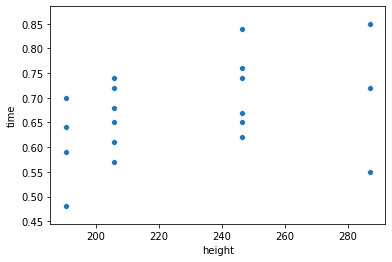

In [6]:
sns.scatterplot(x=fall_data['height'], y=fall_data['time'] )